Determine the effect of Gaussian blur followed by laplacian and sorbel derivative on the variance of image.

In [161]:
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

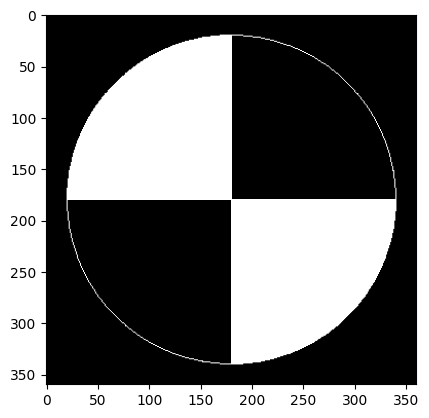

In [162]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

In [163]:
# Initial variance

# Variance of Laplacian mask
laplacian = cv2.Laplacian(image, -1)
var_laplacian = laplacian.var()
print('Laplacian variance : ', var_laplacian)

canny = cv2.Canny(image, 0, 150).var()
print('canny variance : ', canny)

Laplacian variance :  983.123648351766
canny variance :  1013.2610937500004


In [164]:
variances = []
kernel_sizes = []
standard_deviations = []
canny_variance = []

for i in range(0, 50):
    kernel_sizes.append(2*i+1)
    standard_deviations.append(2*i+1)

for i in range(0, 50):
    blurred_image = cv2.GaussianBlur(image, (kernel_sizes[i],kernel_sizes[i]), standard_deviations[i])
    laplacian = cv2.Laplacian(blurred_image, -1)

    variances.append(laplacian.var())

    canny_variance.append(cv2.Canny(blurred_image, 0, 50).var())

df = pd.DataFrame(data=np.transpose([kernel_sizes, standard_deviations, variances, canny_variance]), columns=['Kernel Size', 'Standard Deviation', 'Laplacian Variance', 'Canny Variance'])
    

In [165]:
df

,Kernel Size,Standard Deviation,Laplacian Variance,Canny Variance
0,1.0,1.0,983.123648,1013.261094
1,3.0,3.0,96.069543,1082.173418
2,5.0,5.0,25.257634,1167.369201
3,7.0,7.0,11.063012,1154.798559
4,9.0,9.0,5.974984,1144.157773
5,11.0,11.0,3.704322,1294.713171
6,13.0,13.0,2.432018,1456.964300
7,15.0,15.0,1.832968,873.015816
8,17.0,17.0,1.395540,1240.754363
9,19.0,19.0,1.216083,1745.649554


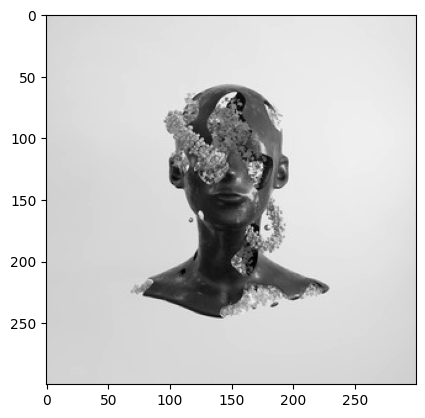

In [166]:
# Cross checking with a test image.

test_image = cv2.imread('../data/sculpture_image.jpg', 0)
plt.imshow(test_image, cmap='gray')

In [167]:
test_variances_laplacian = []
test_variances_canny = []
for i in range(0, 50):
    blurred_image = cv2.GaussianBlur(test_image, (kernel_sizes[i],kernel_sizes[i]), standard_deviations[i])
    laplacian = cv2.Laplacian(blurred_image, -1)

    test_variances_laplacian.append(laplacian.var())
    test_variances_canny.append(cv2.Canny(blurred_image, 0, 150).var())

df['Test Laplacian Variance'] = test_variances_laplacian
df['Test Canny Variance'] = test_variances_canny
     

In [168]:
df

,Kernel Size,Standard Deviation,Laplacian Variance,Canny Variance,Test Laplacian Variance,Test Canny Variance
0,1.0,1.0,983.123648,1013.261094,262.952777,3007.280816
1,3.0,3.0,96.069543,1082.173418,19.176924,2327.608280
2,5.0,5.0,25.257634,1167.369201,4.736978,1552.019879
3,7.0,7.0,11.063012,1154.798559,2.033616,1000.665318
4,9.0,9.0,5.974984,1144.157773,1.154475,609.033775
5,11.0,11.0,3.704322,1294.713171,0.794796,235.399098
6,13.0,13.0,2.432018,1456.964300,0.606861,69.286016
7,15.0,15.0,1.832968,873.015816,0.499801,0.000000
8,17.0,17.0,1.395540,1240.754363,0.459635,0.000000
9,19.0,19.0,1.216083,1745.649554,0.428817,0.000000


Plotting with Laplacian 

<AxesSubplot: xlabel='Kernel Size', ylabel='Laplacian Variance'>

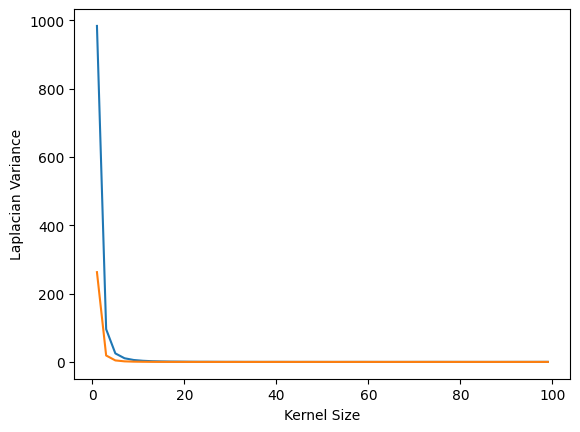

In [169]:
sb.lineplot(x=df['Kernel Size'], y=df['Laplacian Variance'])
plt.plot()

sb.lineplot(x=df['Kernel Size'], y=df['Test Laplacian Variance'])

[]

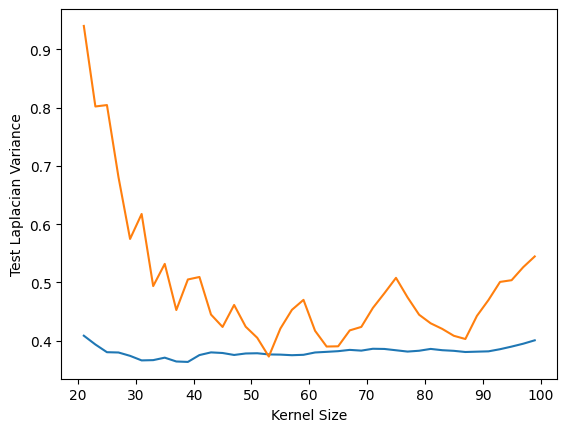

In [170]:
sb.lineplot(x=df['Kernel Size'][10:], y=df['Test Laplacian Variance'][10:])
plt.plot()

sb.lineplot(x=df['Kernel Size'][10:], y=df['Laplacian Variance'][10:])
plt.plot()

<AxesSubplot: xlabel='Kernel Size'>

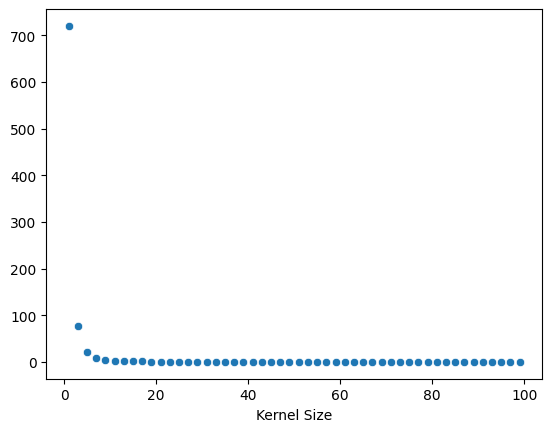

In [171]:
sb.scatterplot(x=df['Kernel Size'], y=df['Laplacian Variance'] - df['Test Laplacian Variance'])

<AxesSubplot: xlabel='Kernel Size'>

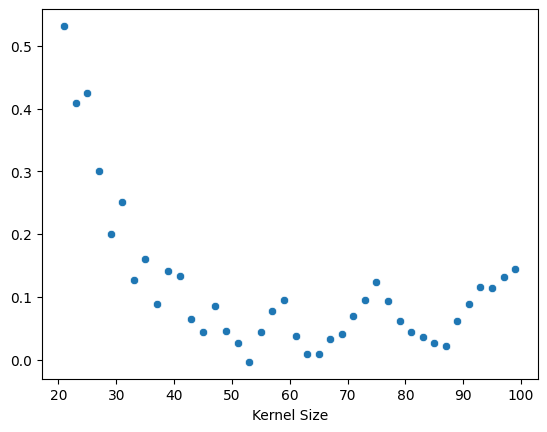

In [172]:
sb.scatterplot(x=df['Kernel Size'][10:], y=df['Laplacian Variance'][10:] - df['Test Laplacian Variance'][10:])

Plotting with Canny

<AxesSubplot: xlabel='Kernel Size', ylabel='Canny Variance'>

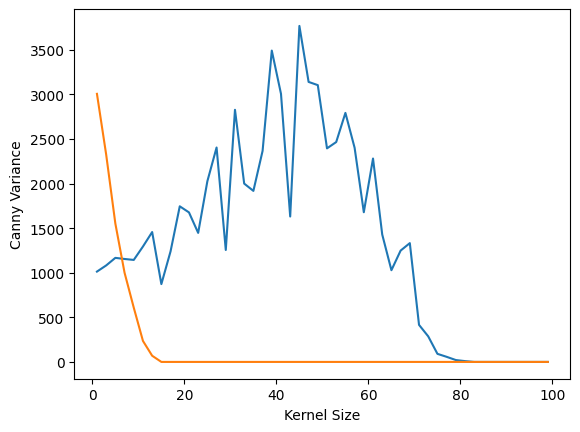

In [173]:
sb.lineplot(x=df['Kernel Size'], y=df['Canny Variance'])
plt.plot()

sb.lineplot(x=df['Kernel Size'], y=df['Test Canny Variance'])

[]

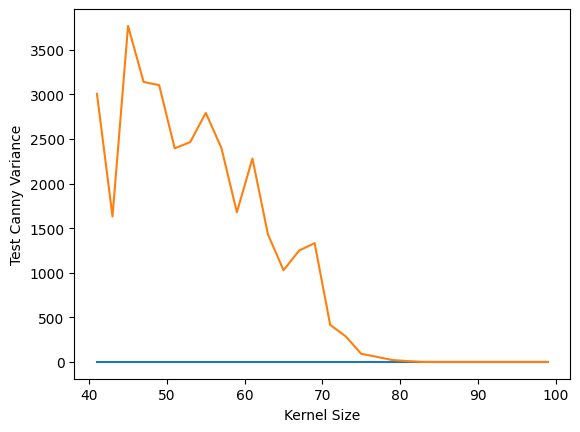

In [174]:
sb.lineplot(x=df['Kernel Size'][20:], y=df['Test Canny Variance'][20:])
plt.plot()

sb.lineplot(x=df['Kernel Size'][20:], y=df['Canny Variance'][20:])
plt.plot()

<AxesSubplot: xlabel='Kernel Size'>

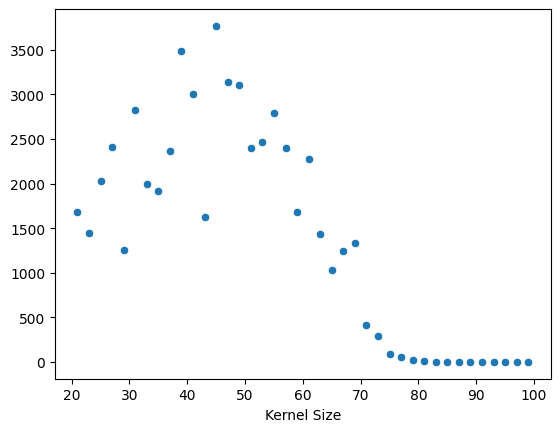

In [175]:
sb.scatterplot(x=df['Kernel Size'][10:], y=df['Canny Variance'][10:] - df['Test Canny Variance'][10:])